# New York Police Rankings & Gender
 

## Summary of Findings

### Introduction
This dataset contains 12,000 complaints filed by NY civilians against police officers. The columns of the dataset contain data about the police officers as well as the complainants. The question I investigate is does the police officers' gender influence whether a police gets demoted after the incident? 

### Cleaning and Handling Missingness
To clean the data, I created a helper function to replace the "Unknowns" into np.NaN. I also created a dictionary that represented the MOS rankings in integer form. Then, I created another helper function to replace the MOS rankings with the integers according to the dictionary for easier comparison later on. Finally, I imputed the missing values in the dataset using probabilistic imputation to generate a more accurate dataset. 

### EDA
I plotted several variables against each other. The main takaways include a rise in complaints throughout the years 2000 and 2018, with a drop in 2020 (probably due to Covid). 


### Hypothesis Test
H0: NY Police officers are no less likely to be demoted if they identify as Male.

H1: NY Police officers are more likely to be demoted if they identify as Male.

For the test statistic, I decided to use mean difference of rank. To clarify, the difference in rank is the rank_now substracted by the rank_incident. To calculate this, I shuffled the complainant_ethnicity column and retrieved mean difference of rank for the Male and non Male complainants. Then, I put each test statistic in a list and counted how many were larger than our observed test statistic of 0.0953. As for the significance value, I decided to use .05. After running the simulations 800 times, I got a p-value of .0075. Since .0075 < .05, the conclusion rejects the null hypothesis that NY Police officers are no less likely to be demoted if they identify as Male.

In [52]:
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [53]:
df = pd.read_csv('police.csv')
df

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Discourtesy,Word,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33354,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Interference with recording,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33355,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Search (of person),66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)
33356,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Vehicle search,66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)


### Cleaning

In [54]:
#dictionary of the rankings corresponding to the string values for easier interpretation
ranking_dict = {'Chiefs and other ranks': 1, 'Deputy Inspector': 2, 'Inspector': 3, 'Captain': 4, 'Lieutenant': 5, 'Sergeant': 6, 'Detective': 7, 'Police Officer': 8}
#this helper function replaces all unknown values to np.NaN
def isUnknown(s):
    if type(s) == str:
        if 'Unknown' in s:
            return np.NaN
        else:
            return s
    else:
        return s
    
#this helper function replaces all the string ranking values with integers so I can compute the change in rankings numerically 
def numericalRank(s):
    return ranking_dict[s]

#creating a copy of the police dataframe
cleaned = df.copy(deep=True)

#cleaning the "unknown" values in the dataframe
for i in list(df.columns):
    cleaned[i] = cleaned[i].apply(isUnknown)

#applying the helper functions to the corresponding columns
cleaned['complainant_ethnicity'] = cleaned['complainant_ethnicity'].apply(isUnknown)
cleaned['numrank_now'] = cleaned['rank_now'].apply(numericalRank)
cleaned['numrank_incident'] = cleaned['rank_incident'].apply(numericalRank)

In [55]:
cleaned.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,numrank_now,numrank_incident
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),8,8
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),8,8
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),8,8
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),8,8
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),8,8


### EDA

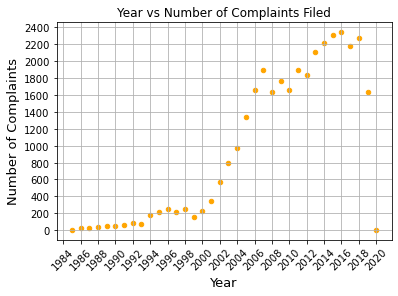

In [57]:
#plotting the number of complaints per year from 1985 to 2020
years = cleaned.groupby('year_received').count()[['first_name']].reset_index()
years.plot.scatter('year_received', 'first_name', title='Year vs Number of Complaints Filed', color = 'orange')
plt.xlabel('Year', color = 'black', fontsize = '13')
plt.ylabel('Number of Complaints', color = 'black', fontsize = '13')
plt.xticks(range(1984, 2022, 2))
plt.yticks(range(0, 2600, 200))
plt.xticks(rotation=45)
plt.grid()
plt.show()

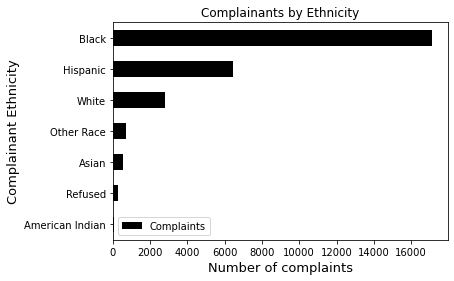

In [59]:
#number of complaints by complainant ethnicity
ethnicity = cleaned.groupby('complainant_ethnicity').count()[['first_name']].reset_index().sort_values('first_name')
ethnicity.rename(columns = {'first_name': 'Complaints'}, inplace = True)                   
ethnicity.plot.barh('complainant_ethnicity', 'Complaints', title = 'Complainants by Ethnicity', color = 'black')
plt.xlabel('Number of complaints', color = 'black', fontsize = '13')
plt.ylabel('Complainant Ethnicity', color = 'black', fontsize = '13')
plt.show()


In [24]:
#comparison between the mos rank before and after the incident, grouped by gender
grouped = cleaned.groupby('complainant_gender').mean()[['numrank_incident', 'numrank_now']]
diff = grouped.diff(axis=1).abs().sort_values(by='numrank_now').reset_index()
grouped

,numrank_incident,numrank_now
complainant_gender,,
Female,7.348337,6.717586
Gender non-conforming,8.000000,8.000000
Male,7.416784,6.720758
Not described,7.192982,6.912281
Transman (FTM),8.000000,8.000000
Transwoman (MTF),6.550000,6.350000


In [49]:
#pivot table comparing the police officer ethnicity and the complainant's ethnicity
complainant_by_ethn = cleaned.pivot_table(index='complainant_ethnicity', 
                     columns='mos_ethnicity', 
                     values='first_name', 
                     aggfunc='count',
                    fill_value = 0) 
complainant_by_ethn

mos_ethnicity,American Indian,Asian,Black,Hispanic,White
complainant_ethnicity,,,,,
American Indian,0,2,4,8,50
Asian,0,61,58,96,317
Black,18,558,2846,4722,8970
Hispanic,2,236,709,2215,3262
Other Race,6,19,98,187,367
Refused,0,18,38,58,145
White,2,129,380,625,1647


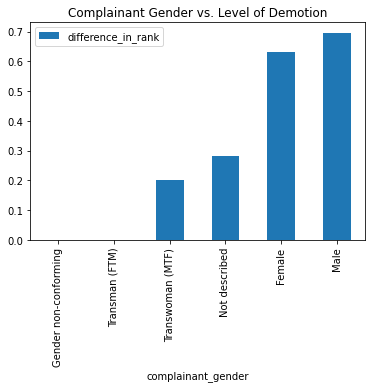

In [25]:
#the higher the y axis, the more the police officer was demoted 
#univariate analysis
diff['difference_in_rank'] = diff['numrank_now']
diff.plot(x = 'complainant_gender', y='difference_in_rank', kind='bar', title='Complainant Gender vs. Level of Demotion')
plt.show()

In [50]:
#complainant gender by mos_gender counts
complainant_by_mos_gender = cleaned.pivot_table(index='complainant_gender', 
                     columns='mos_gender', 
                     values='first_name', 
                     aggfunc='count',
                    fill_value = 0) 
complainant_by_mos_gender

mos_gender,F,M
complainant_gender,,
Female,618,4403
Gender non-conforming,0,2
Male,971,23087
Not described,3,54
Transman (FTM),3,2
Transwoman (MTF),0,20


In [51]:
#same pivot table but in proportions
complainant_by_mos_gender = complainant_by_mos_gender / complainant_by_mos_gender.sum()
complainant_by_mos_gender

mos_gender,F,M
complainant_gender,,
Female,0.387461,0.159714
Gender non-conforming,0.000000,0.000073
Male,0.608777,0.837456
Not described,0.001881,0.001959
Transman (FTM),0.001881,0.000073
Transwoman (MTF),0.000000,0.000725


<AxesSubplot:title={'center':'Counts of Complainant Gender'}>

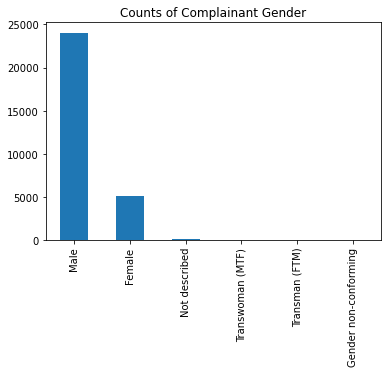

In [14]:
cleaned['complainant_gender'].value_counts().plot(kind = 'bar', title  = 'Counts of Complainant Gender')

<AxesSubplot:title={'center':'Counts of MOS Gender'}>

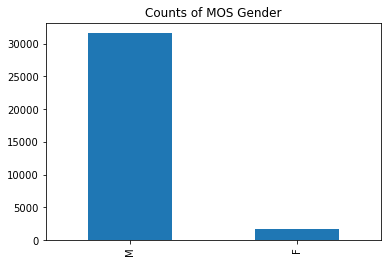

In [15]:
cleaned['mos_gender'].value_counts().plot(kind = 'bar', title  = 'Counts of MOS Gender')

### Handling Missingness

In [61]:
#creating a new copy for handling missingness
new = cleaned.copy(deep = True)

In [62]:
#replacing Transman to Male
new['complainant_gender'] = new['complainant_gender'].replace(['Transman (FTM)'], 'Male')
#replacing Transwoman to Female
new['complainant_gender'] = new['complainant_gender'].replace(['Transwoman (MTF)'], 'Female')
#converting the term F and M to female and male, respectively
new['mos_gender'] = new['mos_gender'].replace(['M'], 'Male')
new['mos_gender'] = new['mos_gender'].replace(['F'], 'Female')
new = new[(cleaned['complainant_gender'] != 'Gender non-conforming') & (new['complainant_gender'] != 'Not described')]


In [63]:
(new.isnull().sum()).sort_values()

unique_mos_id                  0
board_disposition              0
fado_type                      0
mos_age_incident               0
mos_gender                     0
mos_ethnicity                  0
numrank_now                    0
rank_now                       0
rank_abbrev_now                0
rank_abbrev_incident           0
rank_incident                  0
year_closed                    0
first_name                     0
last_name                      0
command_now                    0
shield_no                      0
numrank_incident               0
month_received                 0
year_received                  0
month_closed                   0
complaint_id                   0
allegation                     1
precinct                      24
outcome_description           56
contact_reason               199
command_at_incident         1544
complainant_gender          4195
complainant_age_incident    4788
complainant_ethnicity       5470
dtype: int64

In [64]:
#same pivot describing proportion of complainant ethnicity by mos_ethnicity 
pivot = new.pivot_table(index='complainant_gender', 
                     columns='mos_gender', 
                     values='first_name', 
                     aggfunc='count',
                    fill_value = 0) 
pivot = pivot/pivot.sum()

<AxesSubplot:title={'center':'MOS Gender by Missingess of Complainant Gender'}, ylabel='complainant_gender'>

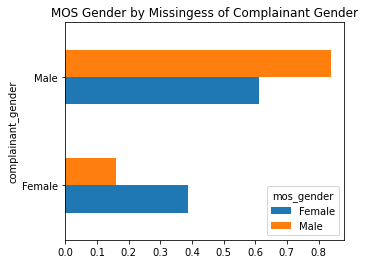

In [65]:
pivot.plot(kind='barh', figsize=(5, 4), title='MOS Gender by Missingess of Complainant Gender')

Because there are null values in the complainant_gender column, I need to impute the nan values using the function below.

#### Probabilistic Imputation

In [66]:
#function imputes missing values in complainant ethnicity column based on mos ethnicity
def impute( mos, compl):
    if pd.isna(compl):
        return np.random.choice(pivot.index, 1, p = pivot[mos].values)[0]
    else:
        return compl
    
new['complainant_gender'] = new.apply(lambda x: impute( x["mos_gender"], x["complainant_gender"]), axis = 1)
new


,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,numrank_now,numrank_incident
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),8,8
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),8,8
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),8,8
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),8,8
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,Female,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,Male,21.0,Discourtesy,Word,66.0,Moving violation,Moving violation summons issued,Unsubstantiated,6,8
33354,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,Male,21.0,Abuse of Authority,Interference with recording,66.0,Moving violation,Moving violation summons issued,Unsubstantiated,6,8
33355,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,Male,21.0,Abuse of Authority,Search (of person),66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training),6,8
33356,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,Male,21.0,Abuse of Authority,Vehicle search,66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training),6,8


After running the function on the dataset, there are no longer nan values in the complainant_gender column.

In [67]:
new['complainant_gender'].isna().sum()

0

### Hypothesis Testing

####  H0: NY police officers are no less likely to get demoted after a complaint is filed against them if they identify as Male.

#### H1: NY police officers are more likely to get demoted after a complaint is filed against them if they identify as Male.

In [68]:
#dataframe with just relevant columns
relevant = new[['mos_gender', 'numrank_now', 'numrank_incident']]
#only black complainants in this dataframe
male = relevant[relevant['mos_gender'] == 'Male'].mean()
#non black complainants in this dataframe
female = relevant[relevant['mos_gender'] == 'Female'].mean()
#the mean difference of rank as observed stat
obs_stat = male.diff()[-1] - female.diff()[-1]


/tmp/ipykernel_162/647968910.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  male = relevant[relevant['mos_gender'] == 'Male'].mean()
/tmp/ipykernel_162/647968910.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  female = relevant[relevant['mos_gender'] == 'Female'].mean()


In [32]:
male, female

(numrank_now         6.619587
 numrank_incident    7.368303
 dtype: float64,
 numrank_now         7.027888
 numrank_incident    7.681275
 dtype: float64)

In [33]:
obs_stat

0.09532954353406264

In [222]:
test_stats = []
n = 800

for i in range(n):
    #calculating the test stat the same as obs stat, but running n times
    relevant['mos_gender'] = relevant['mos_gender'].sample(frac=1).reset_index(drop=True)
    male = relevant[relevant['mos_gender'] == 'Male'].mean()
    female = relevant[relevant['mos_gender'] == 'Female'].mean()
    stat = male.diff()[-1] - female.diff()[-1]
    test_stats.append(stat)

/tmp/ipykernel_162/200810084.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant['mos_gender'] = relevant['mos_gender'].sample(frac=1).reset_index(drop=True)
/tmp/ipykernel_162/200810084.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  black = relevant[relevant['mos_gender'] == 'Male'].mean()
/tmp/ipykernel_162/200810084.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nonblack = relevant[relevant[

In [190]:
test_stats

[-0.02424301164055276,
 -0.03144096433030885,
 -0.015245570778358086,
 -0.012246423824292307,
 0.011146922417414551,
 -0.023643182249739603,
 -0.03144096433030885,
 0.005748457900097037,
 -0.017045058950796665,
 -0.0050484711345371025,
 -0.004448641743723947,
 -0.015845400169171242,
 0.008747604854161928,
 0.022543680842860958,
 -0.00684795930697657,
 0.009347434244975972,
 0.005748457900097037,
 0.03154112170505563,
 0.03514009804993279,
 -0.05243499300876309,
 0.021943851452047802,
 -0.023643182249738715,
 -0.003848812352911679,
 0.00814777546334966,
 -0.026642329203804493,
 -0.008047618088601105,
 0.021943851452046914,
 -0.010446935651854616,
 0.04833634464782044,
 -0.015845400169170354,
 0.005748457900097925,
 0.01594555754391802,
 -0.008047618088601993,
 -0.003248982962097635,
 0.0021494815552181024,
 -0.010446935651854616,
 0.009347434244975084,
 0.017745045716357488,
 0.0021494815552189905,
 -0.0008496653988459002,
 0.007547946072535616,
 -0.029641476157869384,
 -0.0212438646864

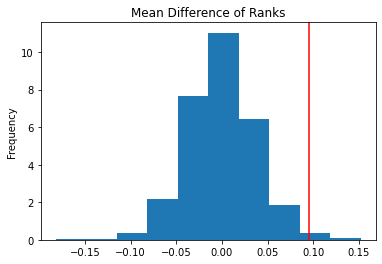

In [223]:
series = pd.Series(test_stats)
p = series.plot(kind='hist', density=True, title='Mean Difference of Ranks')
p.axvline(obs_stat, color = 'red')

In [224]:
#calculating pvalue
pval = (test_stats >= obs_stat).sum() / n
pval

0.0075

In [218]:
obs_stat

0.09562270914729964

### Conclusion

Since the p value is .0075, which is less than the significance value of 5%, I reject the null hypothesis that NY police officers are no less likely to get demoted if their gender is Male. 